In [1]:
# Setting random seed for reproducibility
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)

In [3]:
# Importing packages
import os
import numpy as np
import tensorflow as tf
import itertools

import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    def __init__(self, root, transform=None, target_transform=None):
#         self.img_labels = pd.read_csv(annotations_file)
        self.images = os.listdir(root)
        self.images.sort(key=lambda x: int(re.findall(r"\d+",x)[0]))
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        file = self.images[index]
        img = np.array(Image.open(os.path.join(self.root, file)))
       
        if "dog" in file:
            label = 1
        elif "cat" in file:
            label = 0
        else:
            label = -1
        
        return image, label

In [16]:
train_dataset = CustomImageDataset("\train")

OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: '\train'

In [63]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

In [64]:
# Getting the data
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [65]:
type(cifar10)
type(x_train_all)

numpy.ndarray

In [66]:
# Expore Data
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

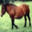

In [67]:
pic = array_to_img(x_train_all[7])
display(pic)

In [68]:
y_train_all.shape

(50000, 1)

In [69]:
y_train_all[7][0]

7

In [70]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

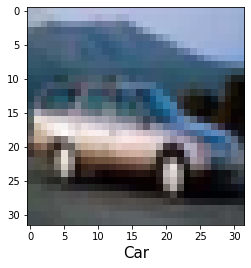

In [71]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.show()

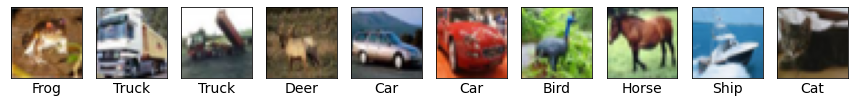

In [72]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])

In [73]:
x_train_all[0].shape

(32, 32, 3)

In [74]:
nr_images, x, y, c = x_train_all.shape
print(f'images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [75]:
x_test.shape

(10000, 32, 32, 3)

In [76]:
# Preprocess data
type(x_train_all[0][0][0][0])

numpy.uint8

In [77]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [78]:
x_train_all[0][0][0][0]

0.23137254901960785

In [79]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [80]:
x_train_all.shape

(50000, 3072)

In [81]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


In [82]:
# Creating validation dataset
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [83]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

In [84]:
# Creating a small dataset for validation
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

In [85]:
# Define NN using Keras
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_output')
])

model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [86]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128,activation="relu"))
model_2.add(Dense(64,activation="relu"))
model_2.add(Dense(16,activation="relu"))
model_2.add(Dense(10,activation="softmax"))

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [87]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128,activation="relu"))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64,activation="relu"))
model_3.add(Dense(16,activation="relu"))
model_3.add(Dense(10,activation="softmax"))

model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [88]:
type(model_1)

keras.engine.sequential.Sequential

In [89]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m1_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Tensorboard (Visual Learning)

def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

In [91]:
# Fit the model
samples_per_batch = 1000


In [92]:

# %time

# model_1.fit(x_train_xs,y_train_xs,batch_size=samples_per_batch,
#             epochs=nr_epochs, callbacks=[get_tensorboard('Model 1')],
#            verbose=0, validation_data=[x_val,y_val])

In [93]:
%time
nr_epochs = 100
model_1.fit(x_train,y_train,batch_size=samples_per_batch,
            epochs=nr_epochs, callbacks=[get_tensorboard('Model 1 XL')],
           verbose=0, validation_data=[x_val,y_val])

Wall time: 0 ns
Successfully created directory


In [94]:
%time
nr_epochs = 100
model_2.fit(x_train,y_train,batch_size=samples_per_batch,
            epochs=nr_epochs, callbacks=[get_tensorboard('Model 2 XL')],
           verbose=0, validation_data=[x_val,y_val])

Wall time: 0 ns
Successfully created directory


In [95]:
%time
nr_epochs = 100
model_3.fit(x_train,y_train,batch_size=samples_per_batch,
            epochs=nr_epochs, callbacks=[get_tensorboard('Model 3 XL')],
           verbose=0, validation_data=[x_val,y_val])

Wall time: 0 ns
Successfully created directory


In [96]:

# %time

# model_2.fit(x_train_xs,y_train_xs,batch_size=samples_per_batch,
#             epochs=nr_epochs, callbacks=[get_tensorboard('Model 2')],
#            verbose=0, validation_data=[x_val,y_val])

In [97]:
# Prediction on individual images
x_val[0].shape

(3072,)

In [98]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [99]:
np.set_printoptions(precision=3)

In [100]:
model_2.predict(test)

1/1 [==============================] - 0s 41ms/step


array([[3.725e-02, 9.323e-03, 7.515e-02, 1.590e-01, 3.675e-02, 1.574e-01,
        4.582e-01, 5.986e-02, 2.122e-04, 6.789e-03]], dtype=float32)

In [104]:
predict_x=model_2.predict(test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

1/1 [==============================] - 0s 18ms/step
[6]


In [105]:
y_val[0]

array([6], dtype=uint8)

In [108]:
for number in range(10):
    test_img = np.expand_dims(x_val[number], axis=0)
    predicted_val = model_2.predict(test_img)[0]
    classes_x=np.argmax(predicted_val)
    print(f'Actual value: {y_val[number][0]} vs. predicted: {classes_x}')

1/1 [==============================] - 0s 17ms/step
Actual value: 6 vs. predicted: 6
1/1 [==============================] - 0s 17ms/step
Actual value: 9 vs. predicted: 1
1/1 [==============================] - 0s 16ms/step
Actual value: 9 vs. predicted: 9
1/1 [==============================] - 0s 17ms/step
Actual value: 4 vs. predicted: 6
1/1 [==============================] - 0s 16ms/step
Actual value: 1 vs. predicted: 8
1/1 [==============================] - 0s 16ms/step
Actual value: 1 vs. predicted: 1
1/1 [==============================] - 0s 17ms/step
Actual value: 2 vs. predicted: 0
1/1 [==============================] - 0s 26ms/step
Actual value: 7 vs. predicted: 7
1/1 [==============================] - 0s 16ms/step
Actual value: 8 vs. predicted: 8
1/1 [==============================] - 0s 17ms/step
Actual value: 3 vs. predicted: 9


In [109]:
model_2.metrics_names

['loss', 'accuracy']

In [110]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 1s 1ms/step - loss: 1.4549 - accuracy: 0.4816
Test loss is 1.45 and test accuracy is 48.2%


In [115]:
# Confusion matrix
predict_x=model_2.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=classes_x)
print(conf_matrix)

313/313 [==============================] - 0s 837us/step
[[549  47  56  11  34  13  25  24 209  32]
 [ 38 690   9  18  13  11  14  14  98  95]
 [ 94  29 317  74 189  69 123  34  52  19]
 [ 47  37  98 269  56 200 152  33  64  44]
 [ 51  19 121  44 475  40 130  58  55   7]
 [ 43  20  99 185  73 343  99  55  61  22]
 [ 15  26  58  71 126  47 598  13  34  12]
 [ 57  33  56  74 131  74  46 434  38  57]
 [ 84  89   7  28  16  11   3   7 721  34]
 [ 59 277   9  25  12  12  27  35 124 420]]


In [116]:
conf_matrix.shape

(10, 10)

In [117]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [118]:
conf_matrix.max()

721

In [119]:
conf_matrix.min()

3

In [120]:
conf_matrix[0]

array([549,  47,  56,  11,  34,  13,  25,  24, 209,  32], dtype=int64)

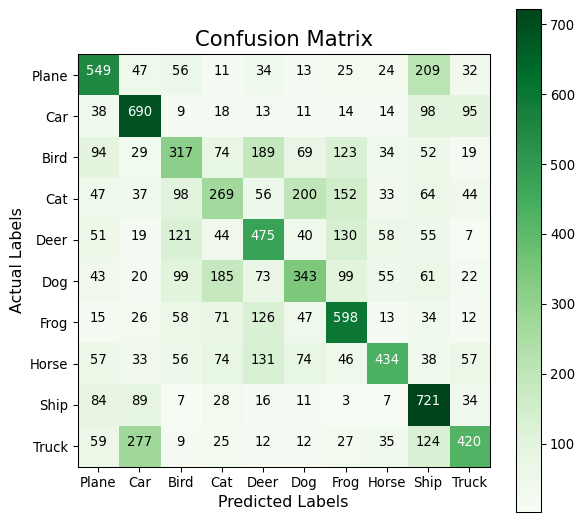

In [121]:
plt.figure(figsize=(7,7), dpi=95)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
            color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')
    

plt.show()

In [122]:
# True Positives
np.diag(conf_matrix)

array([549, 690, 317, 269, 475, 343, 598, 434, 721, 420], dtype=int64)

In [123]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.549, 0.69 , 0.317, 0.269, 0.475, 0.343, 0.598, 0.434, 0.721,
       0.42 ])

In [124]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.529, 0.545, 0.382, 0.337, 0.422, 0.418, 0.491, 0.614, 0.495,
       0.566])

In [125]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 48.16%


In [126]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 f score is {f1_score:.2%}')

Model 2 precision score is 48.00%
Model 2 f score is 48.08%
